## Feature Engineering:
Definition: is a process of extracting useful features from raw data suing math, statistics and domain knowledge.
Outlier detection, one hot encoding, handling missing values are few basic examples of feature engineering.

- Domain Knowledge
- Visualization
- Math/Statistics:outlier


### Outlier Detection and removal using percentile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_height = pd.read_csv(r"C:\Users\Connie Wu\Desktop\rhoda\Python\Python Project\Feature Engineering\heights.csv")

In [3]:
df_height.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [4]:
max_threshold = df_height['height'].quantile(0.95)
max_threshold

9.689999999999998

In [5]:
df_height[df_height['height']>max_threshold]

,name,height
9,imran,14.5


In [6]:
min_thresold = df_height['height'].quantile(0.05)
min_thresold

3.6050000000000004

In [8]:
df_height[df_height['height'] < min_thresold]

,name,height
12,yoseph,1.2


In [9]:
df_height[(df_height['height']<max_threshold )& (df_height['height']>min_thresold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [13]:
# Loading another dataset 

url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/bhp.csv'
df_bhp = pd.read_csv(url)
df_bhp.head

<bound method NDFrame.head of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699

In [14]:
df_bhp.shape

(13200, 7)

In [15]:
df_bhp.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [17]:
min_threshold, max_threshold = df_bhp.price_per_sqft.quantile([0.001,0.999])
min_threshold, max_threshold 

(1366.184, 50959.36200000098)

In [18]:
df_bhp[df_bhp.price_per_sqft < min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [19]:
df_bhp[df_bhp.price_per_sqft > max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [22]:
df_bhp_2 = df_bhp[(df_bhp.price_per_sqft < max_threshold) & (df_bhp.price_per_sqft > min_threshold)]
df_bhp_2.shape

(13172, 7)

In [23]:
df_bhp_2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2529,Kasavanhalli,3 Bedroom,1870.0,3.0,200.00,3,10695
10394,Hebbal,2 BHK,1100.0,2.0,60.00,2,5454
11571,Yelahanka New Town,2 Bedroom,600.0,2.0,80.00,2,13333
8699,other,3 BHK,1707.0,3.0,171.00,3,10017
12779,Sarjapur Road,3 BHK,1691.0,3.0,119.00,3,7037
3504,Whitefield,2 BHK,1495.0,2.0,79.50,2,5317
8593,Old Airport Road,2 BHK,1145.0,2.0,75.00,2,6550
8997,other,2 BHK,1067.0,2.0,33.99,2,3185
9118,Whitefield,3 BHK,1720.0,3.0,98.97,3,5754
11380,Sarjapur,4 Bedroom,2585.5,4.0,115.00,4,4447


### Detect New York Apartment/home dataset outliers

In [25]:
df_NY = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/Exercise/AB_NYC_2019.csv')
df_NY.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
df_NY.shape

(48895, 16)

In [27]:
df_NY.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### From the above result, it is possible that there are some outliers on the columns of price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count 

In [34]:
min_threshold, max_threshold = df_NY.price.quantile([0.01,0.999])
min_threshold, max_threshold

(30.0, 3000.0)

In [35]:
# There are 93 home/apt about the price are outliers
df_NY[(df_NY['price']<min_threshold) |(df_NY['price'] > max_threshold)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,2019-05-26,0.92,1,226
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NaN,NaN,1,83
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,2014-10-20,0.07,1,321
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,NaN,4,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,2019-07-07,1.00,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,NaN,NaN,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,NaN,NaN,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,NaN,NaN,6,338


In [38]:
df_NY_2 = df_NY[(df_NY['price']>min_threshold) & (df_NY['price'] < max_threshold)]
df_NY_2.shape

(48183, 16)

In [39]:
df_NY_2.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7647,5760510,Lower East Side Studio !,1613244,Ariel,Manhattan,Lower East Side,40.72292,-73.99242,Entire home/apt,110,30,17,2019-05-25,0.34,9,276
28192,21966418,Decorated cozy Brooklyn jewish apartment!,160233319,Josh,Brooklyn,Flatlands,40.61970,-73.94426,Entire home/apt,86,2,0,NaN,NaN,1,0
39246,30590265,Charming Private Apartment near Brooklyn Museu...,229181517,Rose,Brooklyn,Crown Heights,40.67179,-73.95363,Entire home/apt,125,3,18,2019-07-01,2.61,1,96
16324,13130332,Welcome to Williamsburg,16708043,Justin,Brooklyn,Williamsburg,40.71066,-73.95726,Private room,85,1,42,2017-11-24,1.14,1,0
48535,36311055,"Stunning & Stylish Brooklyn Luxury, near Train",245712163,Urvashi,Brooklyn,Bedford-Stuyvesant,40.68245,-73.93417,Entire home/apt,1749,1,0,NaN,NaN,1,303


In [40]:
df_NY_2.price.describe()

count    48183.000000
mean       148.772036
std        153.594795
min         31.000000
25%         70.000000
50%        110.000000
75%        179.000000
max       2999.000000
Name: price, dtype: float64

### Outlier detection and removal: z score, standard deviation | Feature engineering tutorial python # 3

https://www.youtube.com/watch?v=KFuEAGR3HS4&list=PLeo1K3hjS3ut5olrDIeVXk9N3Q7mKhDxO&index=4


In [45]:
from matplotlib import pyplot as plt
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (10,6)

In [41]:
df_height = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv")
df_height.shape

(10000, 2)

In [42]:
df_height.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


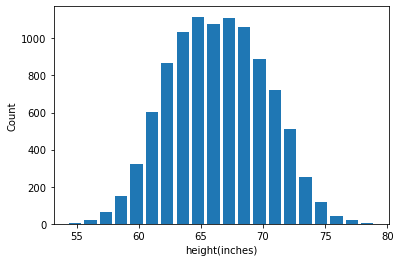

In [47]:
plt.hist(df_height.height, bins = 20, rwidth=0.8)
plt.xlabel('height(inches)')
plt.ylabel('Count')
plt.show()

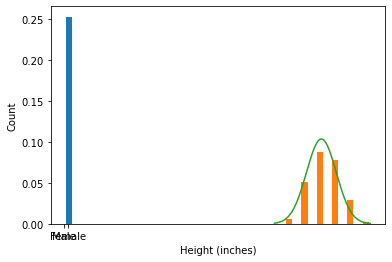

In [51]:
from scipy.stats import norm
import numpy as np
plt.hist(df_height,bins = 20, rwidth =0.8, density =True)
plt.xlabel('Height (inches)')
plt.ylabel("Count")

rng = np.arange(df_height.height.min(), df_height.height.max(),0.1)
plt.plot(rng, norm.pdf(rng, df_height.height.mean(),df_height.height.std()))

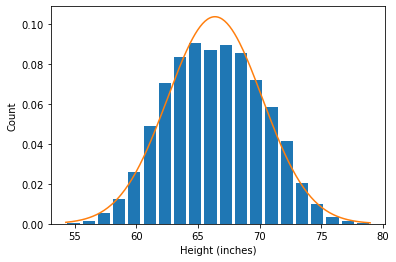

In [53]:
from scipy.stats import norm
import numpy as np
plt.hist(df_height.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df_height.height.min(), df_height.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df_height.height.mean(),df_height.height.std()))